<a href="https://colab.research.google.com/github/victoruwazurike1/credit-card_fraud-detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored as cl
import itertools


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [3]:
df = pd.read_csv('creditcard.csv')
df.drop('Time', axis = 1, inplace = True)
print(df.head())

         V1        V2        V3        V4  ...       V27       V28  Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  149.62    0.0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724    2.69    0.0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  378.66    0.0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  123.50    0.0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153   69.99    0.0

[5 rows x 30 columns]


In [4]:
cases = len(df)
non_fraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/non_fraud_count * 100, 2)
# print(non_fraud_count)
# print(fraud_count)
print(cl('CASE COUNT', attrs= ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of non- fraudulent cases are {}'.format(non_fraud_count), attrs = ['bold']))
print(cl('Number of fraudulent cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraudulent cases are {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('----------------------------------------', attrs = ['bold']))

CASE COUNT
----------------------------------------
Total number of cases are 23858
Number of non- fraudulent cases are 23769
Number of fraudulent cases are 88
Percentage of fraudulent cases are 0.37
----------------------------------------


In [5]:
non_fraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]
print(cl('CASE STATISTICS', attrs= ['bold']))
print(cl('-----------------------------------------', attrs= ['bold']))
print(cl('NON-FRAUDULENT CASES', attrs=['bold']))
print(non_fraud_cases.Amount.describe())
print(cl('-----------------------------------------', attrs= ['bold']))
print(cl('FRAUDULENT CASES', attrs=['bold']))
print(fraud_cases.Amount.describe())
print(cl('-----------------------------------------', attrs= ['bold']))


CASE STATISTICS
-----------------------------------------
NON-FRAUDULENT CASES
count    23769.000000
mean        73.880199
std        212.541174
min          0.000000
25%          6.000000
50%         18.110000
75%         65.850000
max       7879.420000
Name: Amount, dtype: float64
-----------------------------------------
FRAUDULENT CASES
count      88.000000
mean      100.010000
std       265.845031
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64
-----------------------------------------


In [6]:
sc= StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

print(cl(df['Amount'].head(10), attrs=['bold']))

0    0.355539
1   -0.335061
2    1.432074
3    0.232770
4   -0.018738
5   -0.330455
6   -0.324251
7   -0.155937
8    0.090354
9   -0.330408
Name: Amount, dtype: float64


**Time for feature selection and data split**

In [7]:
# DATA SPLIT
df = df.dropna()
df = df.drop('V23', axis = 1)

X = df.drop('Class', axis = 1)
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ',attrs=['bold']), X_train[:1])
print(cl('X_test samples : ', attrs=['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs=['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs=['bold']), y_test[0:20])


X_train samples :              V1        V2        V3  ...      V27       V28   Amount
3870 -0.201673  0.957094  2.550531  ...  0.03215 -0.058905 -0.25591

[1 rows x 28 columns]
X_test samples :              V1        V2        V3  ...       V27       V28    Amount
5306 -5.204116 -2.626612  0.281102  ...  0.232583  1.319172  2.002396

[1 rows x 28 columns]
y_train samples :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test samples :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**We are going to try different models now**

In [8]:
# Modelling
# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# 2. K-Nearest Neigbors 
n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 4. SVM

svm = SVC()
svm.fit(X_train, y_train)
svm_pred= svm.predict(X_test)

# 5. Random Forest Tree

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# 6. XGBoost

xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Time for evaluation**


In [15]:
# We will get the accuracy score for the different models

print(cl('ACCURACY SCORE', attrs=['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_pred)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_pred)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rfc_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


ACCURACY SCORE
Accuracy score of the Decision Tree model is 0.9989522212908634
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9997904442581727
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9981139983235541
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9991617770326907
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9991617770326907
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9993713327745181
------------------------------------------------------------------------


From what we can see above KNN has the highest accuracy even though all of them actually round up to 0.99 i.e 99% accuracy.

In [16]:
# Now we are going to look at the F1 scores of each of these models
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_pred)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_pred)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rfc_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_pred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8648648648648648
------------------------------------------------------------------------
F1 score of the KNN model is 0.9743589743589743
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7272727272727274
------------------------------------------------------------------------
F1 score of the SVM model is 0.888888888888889
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.888888888888889
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.9189189189189189
------------------------------------------------------------------------


Based one what we've seen above the KNN still performs best here while the least is the Logistic Regression model. 

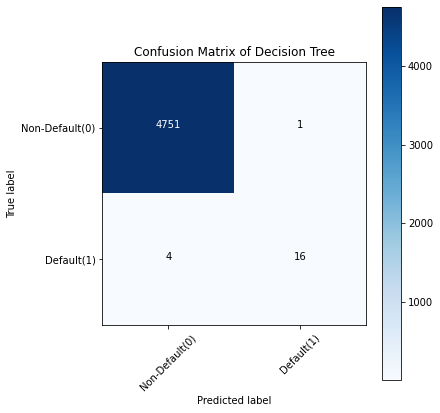

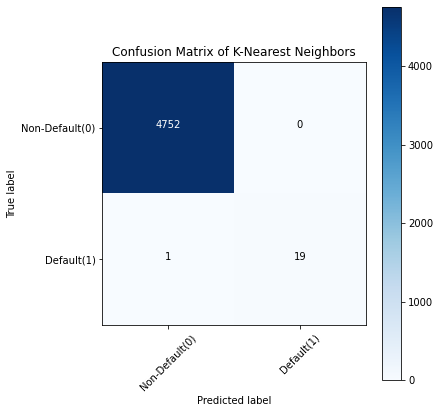

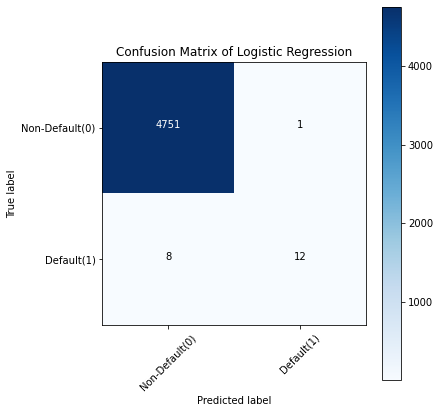

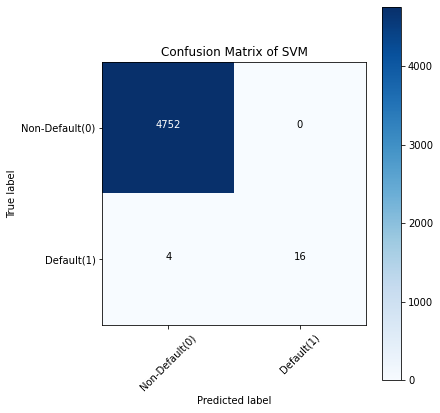

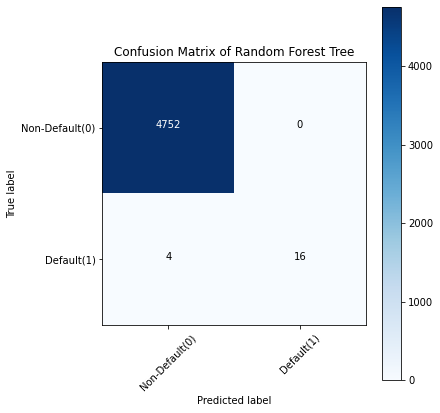

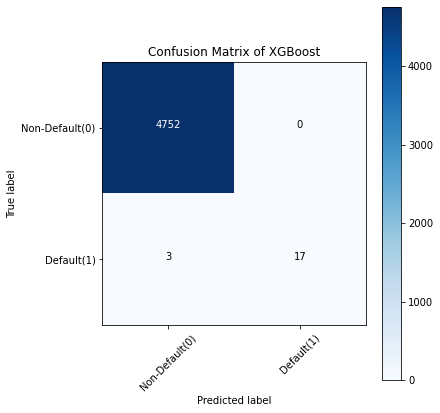

In [18]:
# Now we are going to look at the COnfusion Matrix
# 3. Confusion Matrix

# We will start by defining the plot function for the Confusion Matrix

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_pred, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_pred, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_pred, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_pred, labels = [0, 1]) # Support Vector Machine
rfc_matrix = confusion_matrix(y_test, rfc_pred, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_pred, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'K-Nearest Neighbors')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rfc_cm_plot = plot_confusion_matrix(rfc_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rfc_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()


From the confusion matrix plotting above we can clearly see that KNN performed better than others. Therefore in conclusion we can comfortably say that among all the models applied in this Credit Card Fraud detection project, the KNN model is clearly the best option while the Logistic Regression model can as well be left out.
Note that there are still other models out there that can be used to achieve better results.